In [19]:
import numpy as np
from matplotlib import pyplot as plt
import skrf as rf
import scipy.constants
import scipy.io

def set_font(fontsize=18, font="Times New Roman"):
    rc = {"font.size" : fontsize,
    "font.family" : font,
    "mathtext.fontset" : "stix"}
    plt.rcParams.update(rc)
set_font()

C = scipy.constants.c
mm = 1E-3

horn148 = rf.Network('../../../Data/Horn_Calibration_221109/Horn2Horn148mm_221109.s2p')
horn248 = rf.Network('../../../Data/Horn_Calibration_221109/Horn2Horn248mm_221109.s2p')
horn373 = rf.Network('../../../Data/Horn_Calibration_221109/Horn2Horn373mm_221109.s2p')
horn497 = rf.Network('../../../Data/Horn_Calibration_221109/Horn2Horn497mm_221109.s2p')

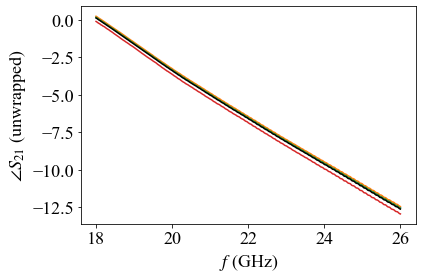

In [20]:
f = horn148.f
lam = C/f
k = 2*np.pi/lam

def extract_phase(network, L, k):
    phase = network.s21.s[:,0,0]/np.exp(-1j*k*L)
    return np.unwrap(np.angle(phase))/2

angle_cal148 = extract_phase(horn148, 148*mm, k)
angle_cal248 = extract_phase(horn248, 248*mm, k)
angle_cal373 = extract_phase(horn373, 373*mm, k)
angle_cal497 = extract_phase(horn497, 497*mm, k)
horn_phase = np.mean(np.stack((angle_cal148, angle_cal248, angle_cal373, angle_cal497), axis=1), axis=1)

fig = plt.figure()
plt.plot(f*1E-9, angle_cal148)
plt.plot(f*1E-9, angle_cal248)
plt.plot(f*1E-9, angle_cal373)
plt.plot(f*1E-9, angle_cal497)
plt.plot(f*1E-9, horn_phase, color='black')
plt.xlabel('$f$ (GHz)')
plt.ylabel(r'$\angle S_{21}$ (unwrapped)')
plt.show()


### Export

In [21]:
scipy.io.savemat('../../../Data/Horn_Calibration_221109/horn_phase.mat', {'horn_phase': horn_phase,
                                                                          'f': f})